# Исследование данных поездок компании GoFast
Были переданы данные о некоторых пользователях из нескольких городов, а также об их поездках. Необходимо проанализировать данные и проверьте некоторые гипотезы, которые могут помочь GoFast вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
* **без подписки:** \
    абонентская плата отсутствует;\
    стоимость одной минуты поездки — 8 рублей;\
    стоимость старта (начала поездки) — 50 рублей;
* **с подпиской Ultra:** \
    абонентская плата — 199 рублей в месяц;\
    стоимость одной минуты поездки — 6 рублей;\
    стоимость старта — бесплатно.

# План проекта
1. **Загрузить 3 файла с данными (пользователи, поездки и подписки) и вывести первые строки и информацию о данных**
2. **Провести предобработку данных:** \
   а. Приведите столбец date к типу даты pandas;\
   b. Создать новый столбец с номером месяца на основе столбца date;\
   c. Проверить наличие пропущенных значений и дубликатов в датафреймах.
3. **Описать и визуализировать общую информацию о пользователях и поездках:** \
   a. Частота встречаемости городов;\
   b. Соотношение пользователей с подпиской и без подписки;\
   c. Возраст пользователей;\
   d. Расстояние, которое пользователь преодолел за одну поездку;\
   e. Продолжительность поездок.
4. **Объединить данные о пользователях, поездках и подписках в один датафрейм (метод merge().** \
    **Создать 2 датафрейма:**
    * c данными о пользователях без подписки;
    * с данными о пользователях с подпиской.
    
   **Визуализировать информацию о расстоянии и времени поездок для пользователей обеих категорий.**
5. **Подсчитать выручку:** \
    a. Создать датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найти суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц; \
    b. В этот же датафрейм добавить столбец с помесячной выручкой, которую принёс каждый пользователь (обратиться к информации об условиях оплаты для подписчиков и тех, у кого нет подписки).
6. **Проверка гипотез:** \
    a. Тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Использовать исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки; \
    b. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?; \
    c. Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделать вывод; \
    d. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. **Какой тест вам понадобился бы для проверки этой гипотезы?**

# План проекта (дополнение)
## Основные задачи
1. Определить в каком (-их) городах пользуются больше/меньше услугами GoFast
2. Выявить кол-во пользователей с платной подпиской и без подписки
3. Рассмотреть возраст, преодолеваемую дистанцию и затраченное время пользователями на поездки
4. Сделать вывод о том, какая группа людей (подписка ultra/подписка free) приносит больше выручки бизнесу. Если первая группа приносит больше, то бизнесу необходимо привлекать людей к оформлению подписок разными способами.
5. Также выяснить какая группа затрачивает больше времени на поездки, что поможет утвердить выгоду пользователей с подпиской для выручки компании
6. Так как оптимальное с точки зрения износа самоката рассояние - 3130 метров, то главная задача выяснить не превышает ли среднее расстояние поездок порогового значения


## Краткий план работы
1. Рассмотреть данные
2. Обработать данные: убрать пропуски, дубликаты и аномальные значения
3. Визуализировать, сравнить и сделать выводы по информацию о пользователях и поездках
4. Проанализировать данные 2-х отдельных групп: с подпиской и без неё
5. Подсчитать помесячную выручку двух отдельных групп
6. Проверить необходимые гипотезы о пользователях и поездках

## 1. Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

try:
    df_users = pd.read_csv('/Users/losky/practicum/practicum/users_go.csv',sep=',')
except:
    df_users = pd.read_csv('/datasets/users_go.csv',sep=',')
try:
    df_rides = pd.read_csv('/Users/losky/practicum/practicum/rides_go.csv',sep=',', decimal = '.')
except:
    df_rides = pd.read_csv('/datasets/rides_go.csv',sep=',', decimal = '.')
try:
    df_sub = pd.read_csv('/Users/losky/practicum/practicum/subscriptions_go.csv',sep=',')
except:
    df_sub = pd.read_csv('/datasets/subscriptions_go.csv',sep=',')

In [2]:
display(df_users.head(10))
display(df_rides.head(10))
display(df_sub.head())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [3]:
print(df_users.info()) #выведем информацию
print(df_rides.info()) #о каждом датафрейме
print(df_sub.info()) #для предобработки данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns)

In [4]:
print(df_users.shape[0])
print(df_rides.shape[0])
print(df_sub.shape[0])

1565
18068
2


**Промежуточный вывод:**
1) В датафрейме df_rides столбец date необходимо привести к типу datetime
2) Пропусков в данных не было обнаружено
3) Уже в предобработке данных необходимо проверить неявные дубликаты и пропуски

## 2. Предобработка данных

Приведем столбец date к типу данных datetime и сразу по просьбе создадим новый столбец с номером месяца на основе столбца date:

In [5]:
import datetime as dt

df_rides['date'] = pd.to_datetime(df_rides['date'], format='%Y-%m-%dT%H:%M:%S')
df_rides['month'] = df_rides['date'].dt.month

Проверим полученный результат:

In [6]:
df_rides.info()
df_rides.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


**Удалось создать новый столбец  сномером месяца и изменить тип данных столбца date**

Проверим данные на наличие неявных дубликатов и пропусков:

In [7]:
print(df_users.duplicated().sum())
print(df_rides.duplicated().sum())
print(df_sub.duplicated().sum())

31
0
0


**Через функцию поиска дубликатов удалось выяснить, что в датафрейме df_users присутствуют дубликаты. Рассмотрев отдельно столбец user_id удалось выяснить, что дублируются идентификаторы. Удалим дубликаты при помощи функции drop_duplicates()**

In [8]:
df_users = df_users.drop_duplicates()
df_users.duplicated().sum()

0

Рассмотрим 2-й датафрейм на наличие дубликатов или ошибок. Вызовем функцию value_counts() к столбцам **duration** и **distance**.

In [9]:
print(df_rides['distance'].value_counts())
print(df_rides['duration'].value_counts())

741.545359     1
4158.226381    1
3672.118870    1
4533.004089    1
2437.274120    1
              ..
2949.530545    1
3289.893471    1
3047.554085    1
2931.718067    1
4031.935032    1
Name: distance, Length: 18068, dtype: int64
0.500000     95
22.184080     1
25.866000     1
22.837062     1
19.173800     1
             ..
18.843765     1
17.644888     1
22.477965     1
19.745218     1
16.537044     1
Name: duration, Length: 17974, dtype: int64


В столбце **duration** можно заметить длительность поездки 0.5. Рассмотрим подробнее строки с данным значением, так как 95 строк слишком много для случайности. Возможно проблема кроется в системной ошибке.

In [10]:
df_rides.loc[df_rides['duration'] == 0.500000]

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


По непонятным причинам в 95 случаях клиенты GoFast использовали самокат всего 0.5 минут и приодолели расстояние около 5.000 метров (не думаю, что они двигались с постоянной скоростью ~166 м/с). Но удалить эти данные мы не можем, так как это повлияет на выручку компании. Скорее всего это может быть системная ошибка.

**Промежуточный вывод:** Была проведена предобработка данных: заменен тип данных в столбце date (object -> datetime), создали столбец month на основе столбца date и были удалены неявные дубликаты. Были оставлены данные о длительности поездки в 0.5 минуты, так как они будут необходимы для расчёта выручки. После предобработки можно приступать к исследовательскому анализу.

Проверим кол-во строк в датафреймах после предобработки. Очевидно, что кол-во строк уменьшилось...

In [11]:
print(df_users.shape[0])
print(df_rides.shape[0])
print(df_sub.shape[0])

1534
18068
2


## 3. Исследовательский анализ данных

Займемся визуализацией данных по представленному плану.

### 3.1.  Частота встречаемости городов

Посмотрим через функцию value_counts() сколько раз встречается каждый город.

In [12]:
df_users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

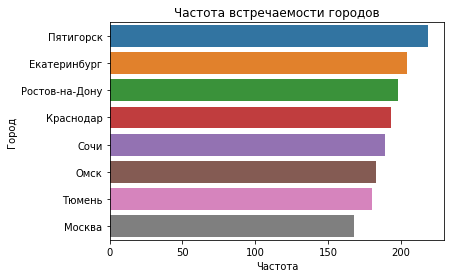

In [13]:
#построим график для частоты встречаемости городов
#в данном случае подойдет горизонтальный барплот для информативности

sns.barplot(
    x=df_users['city'].value_counts(),
    y=df_users['city'].value_counts().index,
    orient='h'
    ).set(title="Частота встречаемости городов")
plt.ylabel("Город")
plt.xlabel("Частота");

**Вывод по графику:**
1) Наименее встречающийся город - Москва (что странно на первый взгляд, учитывая населенность города)\
2) Наибольшее кол-во встречаемости в городе Пятигорск\
3) Отметку выше 200 упоминаний пересекли 2 города - Пятигорск и Екатеринбург (Ростов-на-Дону приблизился к отметке 200 упоминаний)\
\
Пятигорск встречается около 219 раз, Екатеринбург - 204 раз, Ростов-на-Дону - 198 раз, Краснодар - 193 раз, Сочи - 189 раз, Омск - 183 раз, Тюмень - 180, Москва - 168 раз

### 3.2. Соотношение пользователей с подпиской и без подписки

In [14]:
#кол-во людей с подпиской и без запишем в переменную subs для диаграммы
subs = df_users['subscription_type'].value_counts()
subs

free     835
ultra    699
Name: subscription_type, dtype: int64

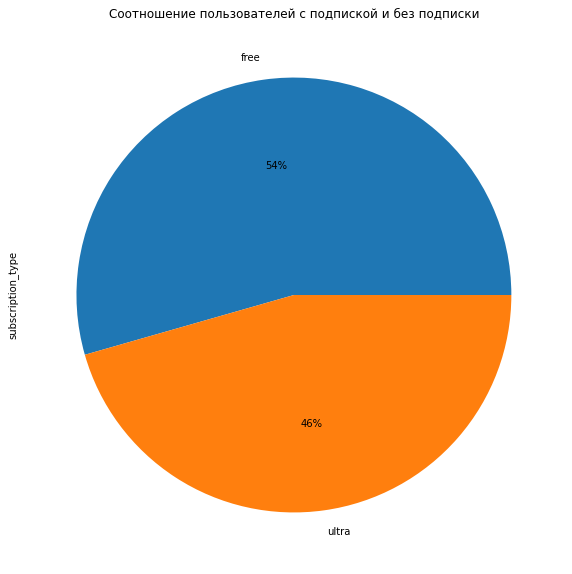

In [15]:
#построим график соотношения пользователей с подпиской и без неё
#рассмотрим соотношение при помощи круговой диаграммы

df_users['subscription_type'].value_counts().plot(
    kind = 'pie', 
    y = subs,
    autopct = '%1.0f%%',
    figsize=(10,10), 
    title = 'Соотношение пользователей с подпиской и без подписки');

**Вывод по графику:** На круговой диаграмме заметна разница между клиентами компании с подпиской и без. Доля пользователей с подпиской составляет 46%, а без подписки - 54%. Клиентов без подписки больше на 136 человек.

### 3.3. Возраст пользователей

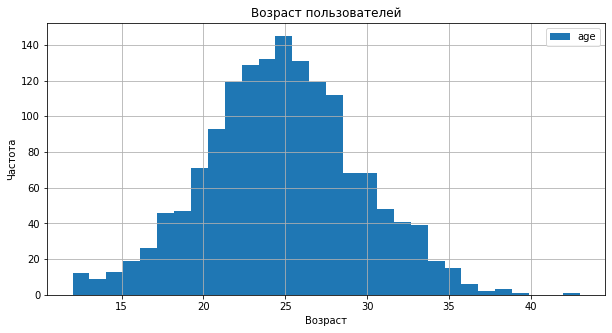

In [16]:
#построим график возрастов пользователей сервиса
df_users['age'].hist(
    bins=30,
    figsize=(10,5),
    legend='возраст',
    grid=True).set(title="Возраст пользователей")
plt.ylabel("Частота")
plt.xlabel("Возраст");

**Вывод по графику:** Чаще всего пользуется услугами компании молодёж. Средний диапазон пользователей - 21-28 лет. *Не считаю правильным, что детям до 18 допускается ездить на самокате (заметка)*.

### 3.4. Расстояние, которое пользователь преодолел за одну поездку

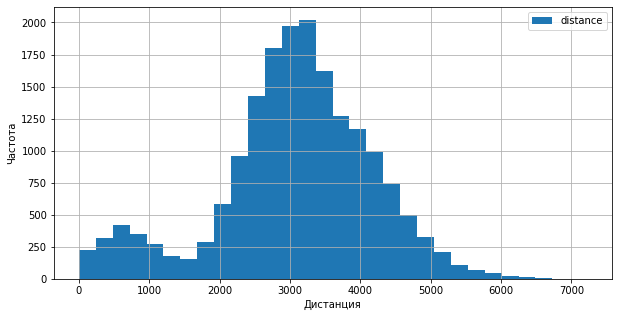

In [17]:
df_rides['distance'].hist(
    bins=30,
    figsize=(10,5),
    legend='возраст',
    grid=True)
plt.ylabel("Частота")
plt.xlabel("Дистанция");

**Вывод по графику:** Чаще всего клиенты компании GoFast преодолевают расстояние в 3000 метров (около 2000 поездок). Меньше всего преодолевают большие расстояния (5.000-7.000 метров).

### 3.5. Продолжительность поездок

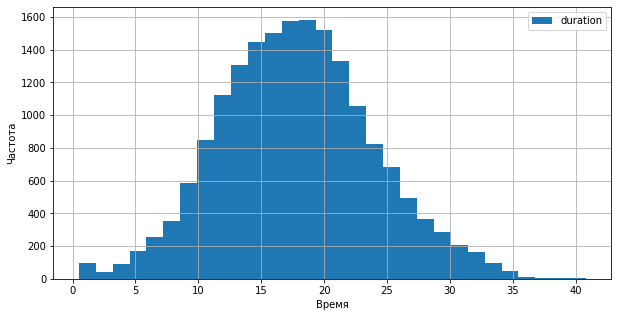

In [18]:
df_rides['duration'].hist(
    bins=30,
    figsize=(10,5),
    legend='возраст',
    grid=True)
plt.ylabel("Частота")
plt.xlabel("Время");

**Вывод по графику:** Пик по времени составляет 15-20 минут. Также, как и в случае с дистанцией, мало кто тратит болльшое кол-во времени на езду. В основном это недолгие поездки. 

### **Промежуточный вывод:**

На этапе исследовательского анализа данных были рассмотрены следующие данные:
1) Частота встречаемости городов:\
    Наименее встречающийся город - Москва - 169 раз\
    Наибольшее кол-во встречаемости в городе Пятигорск - 219 раз\
    Остальные города указаны в пункте 3.1\
2) Соотношение пользователей с подпиской и без неё:\
    Пользователей без подписки оказалось больше, чем с подпиской (отношение 54% к 46%)\
3) Возраст пользователей:\
    Чаще всего пользуется услугами компании молодёж. Средний диапазон пользователей - 21-28 лет. Замечание к данным: странно, что дети (младше 18) могут пользоваться услугами компании
4) Расстояние за 1 поездку:\
    Чаще всего люди преодолевают расстояние в 3000-3100 метров, наименьшее кол-во поездок на большие расстояния (+5000 метров)\
5) Продолжительность поездок:\
    Пик времени составил - 17-18 минут. Много людей берут самокаты на 15-20 минут. Что в случае с дистанцией, что с временем - много ресурсов не затраичается на поездки

### Шаг 4. Объединение данных

Объеденим данные трёх датафреймов 'df_users', 'df_rides' и 'df_sub' по столбцам user_id subscription_type при помощи функции merge().

In [19]:
#объеденим датафреймы по левой таблице
df_merged = df_users.merge(df_sub, on='subscription_type', how='left').merge(df_rides, on='user_id',how='left')
df_merged

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,6,0,199,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,6,0,199,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,6,0,199,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,6,0,199,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,6,0,199,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,8,50,0,3781.098080,19.822962,2021-11-04,11
18064,1534,Альберт,25,Краснодар,free,8,50,0,2840.423057,21.409799,2021-11-16,11
18065,1534,Альберт,25,Краснодар,free,8,50,0,3826.185507,18.435051,2021-11-18,11
18066,1534,Альберт,25,Краснодар,free,8,50,0,2902.308661,16.674362,2021-11-27,11


In [20]:
#проведем проверку размера датафрейма после объединения данных и проверку на пропуски в объединенном датафрейме
print(df_merged.isna().sum())
print('Количество строк в объединенном датафрейме:',df_merged.shape[0])

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
distance             0
duration             0
date                 0
month                0
dtype: int64
Количество строк в объединенном датафрейме: 18068


* В объединенном датафрейме нет пропущенных данных и количество строк соответствует самому большому датафрейму (поездки).

In [21]:
#создадим датафрейм с пользователями, у который имеется подписка
with_sub = df_merged[df_merged['subscription_type'] == 'ultra']
with_sub

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,6,0,199,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,6,0,199,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,6,0,199,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,6,0,199,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,6,0,199,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,6,0,199,3973.046497,24.671163,2021-08-29,8
6496,699,Оксана,22,Москва,ultra,6,0,199,3288.702563,15.892886,2021-09-12,9
6497,699,Оксана,22,Москва,ultra,6,0,199,3076.159348,14.389525,2021-09-26,9
6498,699,Оксана,22,Москва,ultra,6,0,199,4707.845501,15.839579,2021-10-17,10


In [22]:
#и создадим фрейм с пользователями, у которых подписка отсутствует
without_sub = df_merged[df_merged['subscription_type'] == 'free']
without_sub

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month
6500,700,Айдар,22,Омск,free,8,50,0,2515.690719,14.944286,2021-01-02,1
6501,700,Айдар,22,Омск,free,8,50,0,846.932642,16.234663,2021-02-01,2
6502,700,Айдар,22,Омск,free,8,50,0,4004.434142,20.016628,2021-02-04,2
6503,700,Айдар,22,Омск,free,8,50,0,1205.911290,9.782872,2021-02-10,2
6504,700,Айдар,22,Омск,free,8,50,0,3047.379435,17.427673,2021-02-14,2
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,8,50,0,3781.098080,19.822962,2021-11-04,11
18064,1534,Альберт,25,Краснодар,free,8,50,0,2840.423057,21.409799,2021-11-16,11
18065,1534,Альберт,25,Краснодар,free,8,50,0,3826.185507,18.435051,2021-11-18,11
18066,1534,Альберт,25,Краснодар,free,8,50,0,2902.308661,16.674362,2021-11-27,11


Теперь визуализируем и сравним данные о расстоянии и времени поездок двух групп (с подпиской и без).

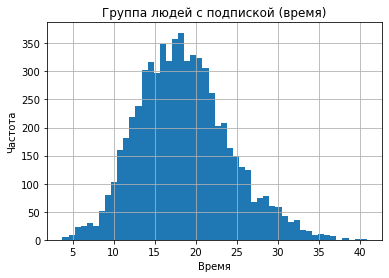

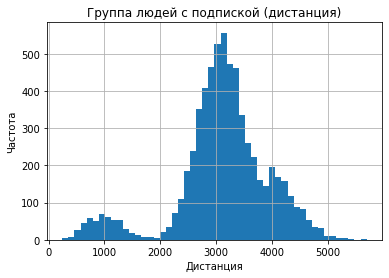

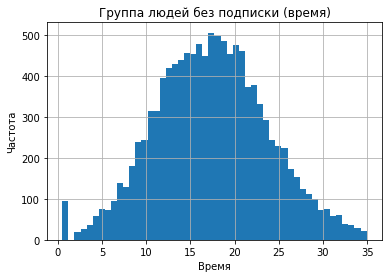

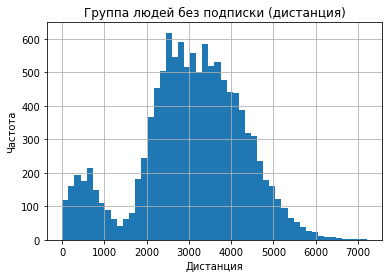

In [23]:
#визуализируем данные фрейма с подпиской
with_sub.hist(
    column = ['duration'],
    legend='',
    bins = 50
)
plt.ylabel("Частота")
plt.xlabel("Время")
plt.title("Группа людей с подпиской (время)")

with_sub.hist(
    column = ['distance'],
    legend='',
    bins = 50
)
plt.ylabel("Частота")
plt.xlabel("Дистанция")
plt.title("Группа людей с подпиской (дистанция)")

without_sub.hist(
    column = ['duration'],
    legend='',
    bins = 50
)
plt.ylabel("Частота")
plt.xlabel("Время")
plt.title("Группа людей без подписки (время)")

without_sub.hist(
    column = ['distance'],
    legend='',
    bins = 50
)
plt.ylabel("Частота")
plt.xlabel("Дистанция")
plt.title("Группа людей без подписки (дистанция)");

plt.show()

### **Вывод:**
Объеденив данные всех датафреймов в единный, удалось выяснить, что поездок пользователей без подписок больше, чем с подписками.\
\
Наиболее частые промежутки по времени поездки людей с подписками - около 17 минут, без подписки - также около 17 минут.\
Наиболее частые промежутки по растоянию поездки людей с подписками - около 3100 метров, без подписки - 2500 метров. Разница в расстоянии между двумя группами может объясняться тем, что пользователи без подписок могли взять самокат в прокат впервые (на пробу) или пользователи крайне редко пользуются услугами шеринга на преодоления небольших расстояний.\
\
Стоит отметить, что на графиках расстояния присутствуют "бугры". Можно предположить, что это с поломкой или недостаточностью заряда самоката. Также в случае с пользователями без подписок есть вариант испытательного заезда (узнать в общем и целом как работает самокат).\
\
У группы людей с подпиской и без есть различия во временных графиках, а именно на графике пользователей без подписки имеется выброс в 0.5 минут. Имеется предположение, что это сбой системы, так как в предобработке мы выяснили, что данный временной промежуток не соответствует пройденному расстоянию. 

### Шаг 5. Подсчёт выручки

#### 5.1. Создадим датафрейм с агрегированными данными о поездах.

In [24]:
#для подсчёта выручки необходимо округлить время до создания сводной таблицы
df_merged['duration'] = np.ceil(df_merged['duration'])
df_merged['duration'].head()

0    26.0
1    16.0
2     7.0
3    19.0
4    27.0
Name: duration, dtype: float64

In [25]:
#через функцию pivot_table агрегируем данные о длительности и дальности поездок,
#и их кол-ве о каждом пользователе за каждый месяц
#для дальнейших вычислений выручки добавим столбецы с типом подписки, стоимости поездки в минуту и стоимость начала поездки
sum_table = df_merged.pivot_table(
    index=['user_id','month'],
    values=['distance','name','duration','subscription_fee','minute_price','start_ride_price','subscription_type'],
    aggfunc={'distance': 'sum',
             'name':'count',
             'duration':'sum',
             'subscription_fee':'first',
             'minute_price':'first',
             'start_ride_price':'first',
             'subscription_type':'first'
            }
)
sum_table.rename(columns={'name':'rides_count'},inplace = True)
sum_table

distance  duration  minute_price  rides_count  \
user_id month                                                      
1       1       7027.511294      42.0             6            2   
        4        754.159807       7.0             6            1   
        8       6723.470560      46.0             6            2   
        10      5809.911100      32.0             6            2   
        11      7003.499363      56.0             6            3   
...                     ...       ...           ...          ...   
1534    6       3409.468534      26.0             8            2   
        8       7622.453034      48.0             8            2   
        9       4928.173852      23.0             8            1   
        11     13350.015305      78.0             8            4   
        12      2371.711192      16.0             8            1   

               start_ride_price  subscription_fee subscription_type  
user_id month                                                        
1       1                     0               199             ultra  
        4                     0               199             ultra  
        8                     0               199             ultra  
        10                    0               199             ultra  
        11                    0               199             ultra  
...                         ...               ...               ...  
1534    6                    50                 0              free  
        8                    50                 0              free  
        9                    50                 0              free  
        11                   50                 0              free  
        12                   50                 0              free  

[11331 rows x 7 columns]

#### 5.2. Посчитаем выручку с каждого пользователя (с подпиской и без неё)

In [26]:
#проверим данные на пропуски перед расчётом выручки
sum_table.isna().sum()
#пропуски не обнаружены, поэтому можно смело перейти к вычислениям

distance             0
duration             0
minute_price         0
rides_count          0
start_ride_price     0
subscription_fee     0
subscription_type    0
dtype: int64

In [27]:
import numpy as np
# каждое значение из столбца duration округляется с помощью «потолка»: 
sum_table['income'] =\
(sum_table['duration']*sum_table['minute_price'])+(sum_table['start_ride_price']*sum_table['rides_count'])+sum_table['subscription_fee']
sum_table

distance  duration  minute_price  rides_count  \
user_id month                                                      
1       1       7027.511294      42.0             6            2   
        4        754.159807       7.0             6            1   
        8       6723.470560      46.0             6            2   
        10      5809.911100      32.0             6            2   
        11      7003.499363      56.0             6            3   
...                     ...       ...           ...          ...   
1534    6       3409.468534      26.0             8            2   
        8       7622.453034      48.0             8            2   
        9       4928.173852      23.0             8            1   
        11     13350.015305      78.0             8            4   
        12      2371.711192      16.0             8            1   

               start_ride_price  subscription_fee subscription_type  income  
user_id month                                                                
1       1                     0               199             ultra   451.0  
        4                     0               199             ultra   241.0  
        8                     0               199             ultra   475.0  
        10                    0               199             ultra   391.0  
        11                    0               199             ultra   535.0  
...                         ...               ...               ...     ...  
1534    6                    50                 0              free   308.0  
        8                    50                 0              free   484.0  
        9                    50                 0              free   234.0  
        11                   50                 0              free   824.0  
        12                   50                 0              free   178.0  

[11331 rows x 8 columns]

### **Вывод:** 
На данном этапе была созданна таблица с агрегированными данными и на основе этих данных посчитана выручка 2 групп людей - с подпиской и без подписки.\
На первый взгляд не скажешь какая группа приносит больше прибыли, так как играет фактор количества поездок в месяц. Рассмотрим в следующем пунке, проверке гипотез, какая группа приносит бизнесу больше выручки.

### Шаг 6. Проверка гипотез

#### Гипотеза №1. Тратят ли пользователи с подпиской больше времени на поездки?

Составим текстовый формат гипотезы:\
H0: пользователи с подпиской тратят столько же времени на поездки, что и пользователи без подписки\
H1: пользователи с подпиской тратят **больше** времени на поездки, чем пользователи без подписки (бизнес заинтересован в том, чтобы пользователи с подпиской приносили больше прибыли)\
\
H0: μ1 = μ2\
H1: μ1 >= μ2

In [28]:
#используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
from scipy import stats as st
import numpy as np
import pandas as pd

alpha = .05 # уровень статистической значимости

hypothesis_one = st.ttest_ind(with_sub['duration'], without_sub['duration'], alternative='greater')
print('p-значение:', hypothesis_one.pvalue)

if hypothesis_one.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


#### Вывод по гипотезе №1. 
P-value больше alpha и ttest показал, что мы отвергаем нулевую гипотезу. Соответсвенно, можно сделать вывод, что пользователи с подпиской «выгоднее» для компании, так как затрачивают больше времени на поездку.

#### Гипотеза №2. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Так как для бизнеса важно, чтобы не первышалось пороговое значение - 3130 метров, то необходимо использовать односторонний тест. Это значит, что можно проверить данную гипотезу при помощи функции st.ttest_1samp() и указать параметр 'greater'. Массивом данных будет выборка людей с подпиской, интересующее нас расстояние - 3130 метров. Общепринятное пороговое значение - 5%.

Составим текстовый формат гипотезы:\
H0: растояние, преодоленное пользователем с подпиской не превышает 3130 метров\
H1: растояние, преодоленное пользователем с подпиской превышает 3130 метров\
\
H0: μ1 = μ2\
H1: μ1 > μ2

In [29]:
from scipy import stats as st

interested_value_first = 3130 #предполагаемое среднее расстояние
alpha = 0.05 # уровень статистической значимости
hypothesis_two = st.ttest_1samp(
    with_sub['distance'], 
    interested_value_first,
    alternative = 'greater'
)
print('p-значение:', hypothesis_two.pvalue)

if hypothesis_two.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


#### Вывод по гипотезе №2.
Гипотезу не удалось отвергнуть. Следовательно, можно сказать, что среднее расстояние которое проезжают пользователи с подпиской за 1 поездку, не превышает 3130 метров. Соответственно, пороговое значение не превышается - затрат на содержание и ремонт самокатов меньше.

#### Гипотеза №3. Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Составим текстовый формат гипотезы:\
H0: выручка с пользователей с подпиской не превышает выручки с пользователей без подписки\
H1: выручка с пользователей с подпиской больше, чем с пользователей без подписки\
\
H0: μ1 = μ2\
H1: μ1 > μ2

In [30]:
#используем односторонний тест для проверки гипотезы
#за массивы будут приниматься сводные таблице, сформированные выше
alpha=0.05
hypothesis_three = st.ttest_ind(sum_table.loc[sum_table['subscription_type'] == 'ultra']['income'], sum_table['income'], alternative='greater')
print('p-значение:', hypothesis_three.pvalue)

if hypothesis_three.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.9208280554554962e-17
Отвергаем нулевую гипотезу


#### Вывод по гипотезе №3. Гипотезу не удалось отвергнуть
Проведя одностороннее тестирование гипотезы, p-value больше уровня значимости, что позволяет отвергнуть гипотезу.\
Следовательно, группа с подписками приносит больше выручки компании GoFast и им стоит задуматься о привлечении "подписчиков".

#### Гипотеза №4. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Проверяется гипотеза о том, что техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Команда надеется, что из-за этого количество обращений в техподдержку значимо снизилось после проведенных действий. В данной ситуации также используем ttest, а именно функцию scipy.stats.ttest_rel().\
\
В данном случае рассматривается ситуация, что количество обращений в техподдержку должно снизиться. Следовательно, это односторонняя гипотеза и мы будем указывать альтернативный параметр 'less'.\
\
Следующим шагом определить правильное рассположение массивов. По логике кода массивы могут располагаться: before>after и указать 'greater', либо after<before с параметром 'less'. Оба варианта правильные, но так как мы решили использовать аргумент 'less', то будем массив after указывать 1-м, а массив before, соответственно, 2-м.\
\
Получилась следующая строка кода:\
**scipy.stats.ttest_rel(after, before, alternative = 'less')**

#### Вывод по гипотезе №4. 
Если бы в условии проекта стояла задача проанализировать снижение обращений в техподдержку после обновления сервиса, то мы бы использовали ttest о равенстве сравнения генеральной совокупности до и после изменения. Использовали бы следующую строку scipy.stats.ttest_rel(after, before, alternative = 'less').

# Общий вывод

Была проведена аналитика данных популярного сервиса аренды самокатов GoFast. Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Были предложены данные о некоторых пользователях из нескольких городов, а также об их поездках.\
\
Данные содержались в 3-х файлах, которые были были безошибочно открыты. В первом файле содержатся данные о пользователях (имя, возраст, город, наличие или отсутствие подписки). Второй файл содержится данные о дистанции поездок пользователей, длительности поездок и даты поездок. И в третьем файле содержатся данные о подписках - стоимости старта, стоимости подписки в месяц и стоимости минуты поездки.\
\
В предобработке данных были проведены следующие виды работы:
* Замена типа данных столбца 'data' на тип данных pandas
* Удаление неявных дубликатов (выявлено 31)
* Удалено 95 поездок с большой дистанцией с коротким временным промежутком\
\
Также был создан столбец с месяцем поездки для дальнеших вычислений.\
\
В исследовательском анализе были визуализированы данные при помощи графиков.
1) Частота встречаемости городов\
Наименее встречающийся город - Москва\
Наибольшее кол-во встречаемости в городе Пятигорск\
2) Соотношение пользователей с подпиской и без неё\
Пользователей без подписки оказалось больше, чем с подпиской\
3) Возраст пользователей\
Чаще всего пользуется услугами компании молодёж. Средний диапазон пользователей - 21-28 лет. Замечание к данным: странно, что дети (младше 18) могут пользоваться услугами компании\
4) Расстояние за 1 поездку\
Чаще всего люди преодолевают расстояние в 3000-3100 метров, наименьшее кол-во поездок на большие расстояния (+5000 метров)\
5) Продолжительность поездок\
Пик времени составил - 17-18 минут. Много людей берут самокаты на 15-20 минут. Что в случае с дистанцией, что с временем - много ресурсов не затраичается на поездки\
\
Следующий шагом необходимо было создать сводные таблицы. Условия были отсортировать людей на 2 группы: с подпиской и без подписки. Объеденив данные всех датафреймов в единный, удалось выяснить, что поездок пользователей без подписок больше, чем с подписками. Стоит отметить, что на графиках расстояния присутствуют "бугры". Можно предположить, что это с поломкой или недостаточностью заряда самоката. Также в случае с пользователями без подписок есть вариант испытательного заезда (узнать в общем и целом как работает самокат).\
\
Используя созданные датафреймы по подпискам, использовались данные для расчёта выручки. После агрегирования данных о поездках пользователей по месяцам и индетификатору пользователей, был произведен расчёт выручки. Важно отметить, что время было округлено в большую сторону (например, если выручка с человека получалась 450.3 или 450.6, то данные округлялись до 451 руб.).\
\
Заключительный этап в проекте - проверка гипотез.
* **Гипотеза 1.** Тратят ли пользователи с подпиской больше времени на поездки? **Ответ:** Да, при проведении одностороннего ttest-а удалось выявить, что пользователи с подпиской тратят больше времени на поездку, чем пользователи без подписки. Значит для бизнеса пользователь с подпиской может быть выгоднее.
* **Гипотеза 2.** Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? **Ответ:** Гипотезу не удалось отвергнуть. Следовательно, можно сказать, что среднее расстояние которое проезжают пользователи с подпиской за 1 поездку, не превышает 3130 метров.
* **Гипотеза 3.** Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки? **Ответ:** Да, группа с подписками приносит больше выручки GoFast и компании стоит повысить заинтересованность потребителя в подписках.
* **Гипотеза 4.** Какой тест вам понадобился бы для проверки гипотезы "техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось"? **Ответ:** Ttest о равенстве сравнения генеральной совокупности до и после изменения. Использовали бы следующую строку scipy.stats.ttest_rel(after, before, alternative = 'less') или scipy.stats.ttest_rel(before, after, alternative = 'greater').\
\
Подводя итог к вопросу "выгодны ли для компании пользователи с подпиской", можно утверждать, что да. Те, кто оформил платную подписку, затрачивают больше времени на поездки и приносят больше выручки по месяцам для компании, насмотря на то, что пользователей с подпиской почти в 2 раза меньше, чем пользователей без подписки.\
\
Заметки для проекта (несомненно возникают вопросы при изучении данных):
* Протеворечивые данные о поездках. За 0.5 минуты было преодалено расстояние ~4000 метров, при этом такого рода поездки приносят выручку компании. Вопрос: что делать с такого рода аномальными значениями?
* Была мысль, что по закону запрещается детям до 18 пользоваться электросамокатами, но увидел, что с 4 апреля 2023 года вступил в силу новых закон о разрешении самостоятельной езде с 14 лет, но все же есть дети младше 14 лет (не хочу быть душным, просто выделяю факты :)).
* Также показалось странным, что самокаты доступны круглый год, хотя в период зимы и до середины весны, примерно, они не доступны для использования.

- [x]  открыт 3 файла
- [x]  файлы изучены (выведены первые строки, метод `info()` и т.д.)
- [x]  столбец date приведен к типу данных pandas
- [x]  cоздаy новый столбец с номером месяца на основе столбца date.
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  устранены дубликаты
- [x]  описана и визуализирована информация о пользователях и поздках:
        - частота встречаемости городов;
        - соотношение пользователей с подпиской и без подписки;
        - возраст пользователей;
        - расстояние, которое пользователь преодолел за одну поездку;
        - продолжительность поездок
- [x]  объединены данные о пользователях, поездках и подписках в один датафрейм методом merge().
- [x]  было создано 2 датафрейма:
       - c данными о пользователях без подписки;
       - с данными о пользователях с подпиской
- [x]  Визуализирована информация о расстоянии и времени поездок для пользователей обеих категорий.
- [x]  создан датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4. 
- [x]  найдено:
       - суммарное расстояние;
       - количество поездок;
       - суммарное время для каждого пользователя за каждый месяц
- [x]  в этот же датафрейм добавлен столбец с помесячной выручкой, которую принёс каждый пользователь (обратиться к информации об условиях оплаты для подписчиков и тех, у кого нет подписки)
- [x] проверены 4 представленных гипотезы и сделаны выводы по ним
- [x]  есть общий вывод